<a href="https://colab.research.google.com/github/adimemes/Project-CLustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusetering Bank Tractation Data

Persiapan Libary

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


### Dataset

Untuk dataset sudah di simpan pada Google Drive dan dipanggil dengan bantuan libary pandas menggunakan .read_csv karena tipe data adalah csv


In [471]:
url = "/content/drive/MyDrive/bank_transactions_data_edited.csv"
Bank_data = pd.read_csv(url)

# Exploratory Data Analysis (EDA)

In [472]:
Bank_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


code .head() pada pandas memungkinkan untuk membaca data dari dataset yang sudah dipanggil tadi, dan mengeluarkan output berupa nilai data pada kolom yang ada di dataset

In [473]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

kemudian ada .info() yang mengeluarkan output info dari setiap kolom pada dataset mulai dari nama kolom, jumlah barisnya dan juga type data dari kolomnya.
untuk lebih rinci kolom setiap data yaitu :


| Fitur                 | Deskripsi                          |
| --------------------- | ---------------------------------- |
| `TransactionAmount`   | Nilai transaksi                    |
| `TransactionType`     | Debit / Credit                     |
| `Location`            | Kota asal transaksi                |
| `Channel`             | ATM / Online / Branch              |
| `CustomerAge`         | Umur pelanggan (ada missing value) |
| `CustomerOccupation`  | Pekerjaan pelanggan                |
| `TransactionDuration` | Lama waktu transaksi (detik?)      |
| `LoginAttempts`       | Jumlah percobaan login             |
| `TransactionID`       | Id Transaksi pelanggan             |
| `AccountID`           | Acount Id pelanggan                |
| `IP Address`          | IP Addres dari Pelanggan           |
| `DeviceID`            | ID Device dari pelanggan           |
| `MerchantID `         | ID MErchant                        |


In [474]:
Bank_data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


kemudian dengan bantuan .describe() berguna untuk melihat data dari setiap kolom mulai dari jumlah, nilai mean,std,min,25%,50%,75% dan nilai max dari setiap kolom yang ada

## Visualisasi DATA

pada tahap ini akan dilakukan 3 visualisasi:
* tipe transaksi yang digunakan
* pekerjaan Costumer
* Negara dari costumer

### Visualisasi Tipe transaksi

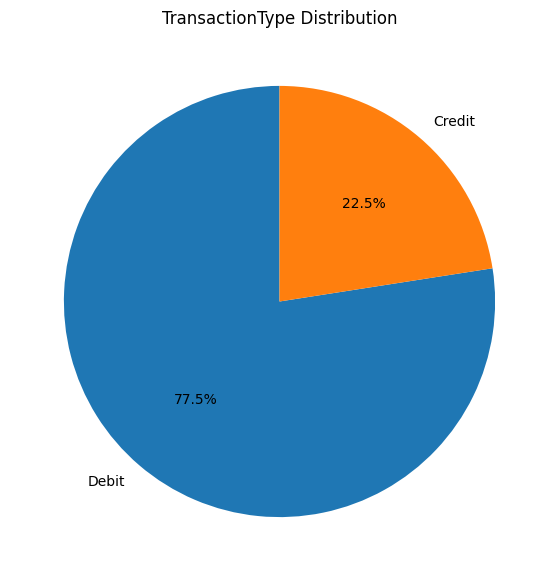

In [475]:
plt.figure(figsize=(7, 7))
plt.pie(Bank_data['TransactionType'].value_counts(), labels=['Debit', 'Credit'], autopct='%1.1f%%', startangle=90)
plt.title('TransactionType Distribution')
plt.show()

Pada Visualisasi yang telah dilakukan, dilihat disini kebanyakan costumer menggunakan debit dalam transaksi dibandingkan credit yaitu 77.5% costumer menggunakan Debit dan 22.5% menggunakan credit

### Pekerjaan Costumer

<ipython-input-476-1a478037c99d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Costumer.index, y=Costumer.values, palette="viridis")


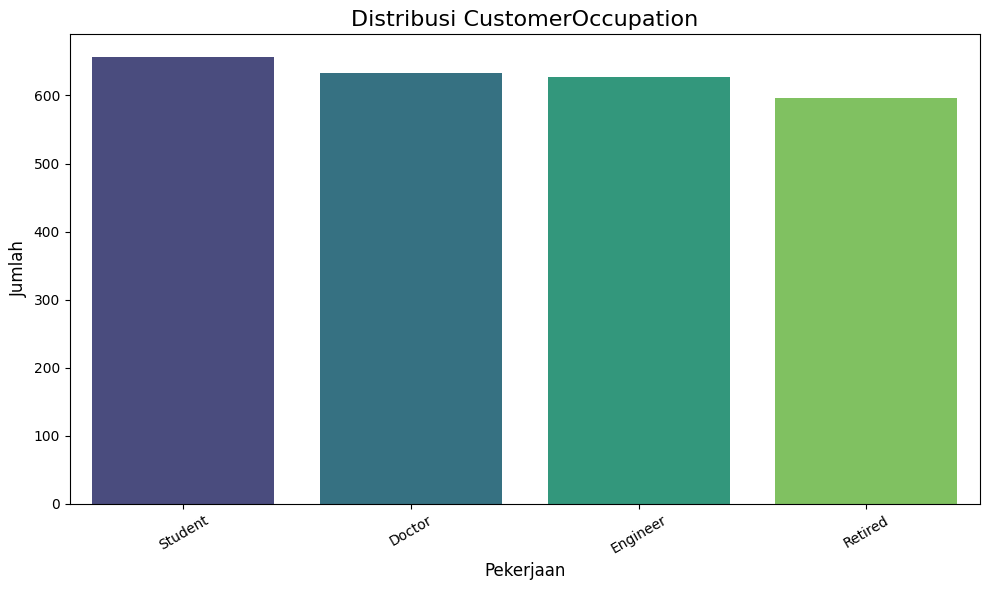

In [476]:
Costumer = Bank_data.CustomerOccupation.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=Costumer.index, y=Costumer.values, palette="viridis")
plt.title("Distribusi CustomerOccupation", fontsize=16)
plt.xlabel("Pekerjaan", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Pada Visualisasi data di atas, dilihat bahwa costumer lebih banyak berstatus pelajar dengan jumlah lebih dari 600 data, dan paling dikit adalah pensiunan, dilihat data ini jumlah perbedaanya tidak terlalu jauh dari satu data ke data yang lain

### Negara dari Costumer

<ipython-input-477-a1c9d06ab471>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=location_counts.index, x=location_counts.values, palette='Set2')


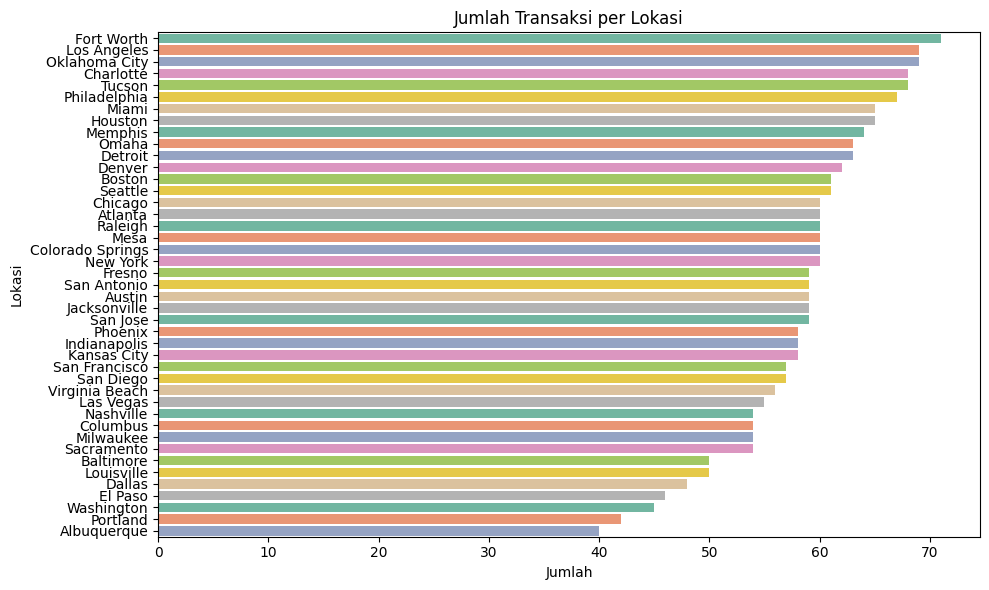

In [477]:
location_counts = Bank_data['Location'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=location_counts.index, x=location_counts.values, palette='Set2')
plt.title('Jumlah Transaksi per Lokasi')
plt.xlabel('Jumlah')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

Dari Visualisasi di atas dilihat bahwa jumlah transaksi terbanyak ada di lokasi fort worth yaitu di atas 60 dan paling sedikit ada di albuquerque yaitu dengan jumlah dibawah 40

# Pra Pemrosesan Data

Pada tahapan ini ada beberapa langkah yaitu:
* memperbaiki type data
* membersihkan missing value dan duplicated
* menghilankan kolom yang tidak perlu dalam dataset
* Pembersihan Outlier data
* Melakukan  feature scaling
* melakukan feature encoding


## Memperbaiki Type data

Pada colom :
* TransactionDate
* PreviousTransactionDate

type data yang digunakan salah, seharusnya menggunakan type datetime bukan sebuah object maka dari itu perlu dilakukan perbaikan

In [478]:
Bank_data['TransactionDate'] = pd.to_datetime(Bank_data['TransactionDate'], errors='coerce')
Bank_data['PreviousTransactionDate'] = pd.to_datetime(Bank_data['PreviousTransactionDate'], errors='coerce')

## Membersihkan Missing Value dan Duplicated

### Memeriksa missing value dan duplicated

In [479]:
print("Jumlah Missing Value di setiap kolom:")
print(Bank_data.isnull().sum())

Jumlah Missing Value di setiap kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


Dilihat disini semua kolom pada data memiliki missing value, dengan yang terbanyak adalah 30 dan paling dikit adalah 18

In [480]:
print("Jumlah Duplikasi Data:")
print(Bank_data.duplicated().sum())

Jumlah Duplikasi Data:
21


Data yang memiliki duplicated pada dataset hanya berjumlah 21

### Pembersihan Missing Value dan Duplicated

pada kode dibawah ini ada beberapa metode yang digunakan untuk membersihkan data duplikat :
* menggunakan .dropna() yaitu menghapus nilai missing value pada kolom tersebut
* menggunakn .fillna().median(), .fillna().mode(), .fillna().max() yaitu mengganti nilai yang missing itu dengan nilai median setiap data, nilai modus setiap data dan nilai yang tertinggi setiap data

untuk data yang memiliki type data numeric menggunakan median, untuk data yang bertipe catagorical menggunakan mode, dan untuk data yang bertipe datetime menggunakan max

In [481]:
# Colom tidak penting bisa dihapus dengan code .dropna
Bank_data_cleaned = Bank_data.dropna(subset=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

# mengisi nilai median untuk data numerik
Bank_data['TransactionAmount'].fillna(Bank_data['TransactionAmount'].median(), inplace=True)
Bank_data['CustomerAge'].fillna(Bank_data['CustomerAge'].median(), inplace=True)
Bank_data['TransactionDuration'].fillna(Bank_data['TransactionDuration'].median(), inplace=True)
Bank_data['LoginAttempts'].fillna(Bank_data['LoginAttempts'].median(), inplace=True)
Bank_data['AccountBalance'].fillna(Bank_data['AccountBalance'].median(), inplace=True)

# mengisi nilai modus untuk data catagorical
Bank_data['TransactionType'].fillna(Bank_data['TransactionType'].mode()[0], inplace=True)
Bank_data['Location'].fillna(Bank_data['Location'].mode()[0], inplace=True)
Bank_data['Channel'].fillna(Bank_data['Channel'].mode()[0], inplace=True)
Bank_data['CustomerOccupation'].fillna(Bank_data['CustomerOccupation'].mode()[0], inplace=True)

# Mengisi nilai max untuk tanggal (setelah dikonversi ke datetime)
Bank_data['TransactionDate'].fillna(Bank_data['TransactionDate'].max(), inplace=True)
Bank_data['PreviousTransactionDate'].fillna(Bank_data['PreviousTransactionDate'].max(), inplace=True)

<ipython-input-481-4d7759f390a1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Bank_data['TransactionAmount'].fillna(Bank_data['TransactionAmount'].median(), inplace=True)
<ipython-input-481-4d7759f390a1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

Data yang duplicated pada dataset lumayan kecil yaitu berjumlah 21, bisa menggunakan cara .drop_duplicates() dalam mengatasi data yang duplicated dimana akan menghapus nilai yang duplicated dalam dataset

In [482]:
Bank_data_cleaned_duplicated = Bank_data.drop_duplicates()

### Kondisi data setelah pembersihan missing value dan duplicated

In [483]:
print("Jumlah Missing Value di setiap kolom setelah pembersihan:")
print(Bank_data_cleaned.isnull().sum())
print("\nJumlah Duplikasi Data setelah pembersihan:")
print(Bank_data_cleaned_duplicated.duplicated().sum())

Jumlah Missing Value di setiap kolom setelah pembersihan:
TransactionID               0
AccountID                   0
TransactionAmount          24
TransactionDate            27
TransactionType            30
Location                   30
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                    26
CustomerAge                18
CustomerOccupation         23
TransactionDuration        24
LoginAttempts              20
AccountBalance             26
PreviousTransactionDate    22
dtype: int64

Jumlah Duplikasi Data setelah pembersihan:
0


## Menghapus kolom dalam dataset yang tidak berguna

Dalam tahapan ini akan menghapus kolom yang tidak berguna dalam pengembangan model nantinya kolom tersebut diantara lain adalah
* TransactionID
* AccountID
* DeviceID  
* IPAddress
* MerchantID

In [484]:
drop_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
Bank_data = Bank_data.drop(columns=drop_columns, errors='ignore')


Kondisi setelah melakuakn drop kolom

In [485]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2537 non-null   float64       
 1   TransactionDate          2537 non-null   datetime64[ns]
 2   TransactionType          2537 non-null   object        
 3   Location                 2537 non-null   object        
 4   Channel                  2537 non-null   object        
 5   CustomerAge              2537 non-null   float64       
 6   CustomerOccupation       2537 non-null   object        
 7   TransactionDuration      2537 non-null   float64       
 8   LoginAttempts            2537 non-null   float64       
 9   AccountBalance           2537 non-null   float64       
 10  PreviousTransactionDate  2537 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 218.2+ KB


Terlihat sudah pada data yang baru dataset hanya memiliki 10 kolom, dengan awal memiliki 16 kolom

## Pembersihan Outlier Data

Pada tahapan ini akan melakukan pembersihan data yang diluar outlier, atau data yang memiliki nilai ketinggian atau kekecilan. bisa dibilang data yang anomali

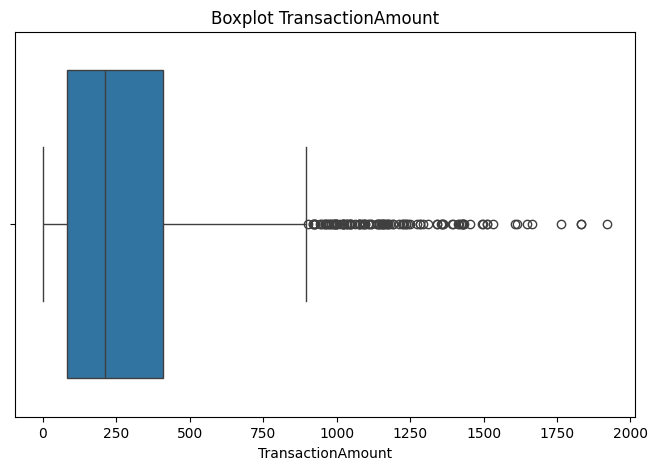

In [486]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=Bank_data['TransactionAmount'])
plt.title('Boxplot TransactionAmount')
plt.show()

Pada gambar tersebut terlihat ada banyak data yang keluar dari outlier, untuk itukita bisa mengatasinya dengan cara IQR (Interquartile Range) seperti kode dibawah ini

In [487]:
Q1 = Bank_data['TransactionAmount'].quantile(0.25)
Q3 = Bank_data['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
Bank_data_outlier = Bank_data[~((Bank_data['TransactionAmount'] < (Q1 - 1.5 * IQR)) | (Bank_data['TransactionAmount'] > (Q3 + 1.5 * IQR)))]


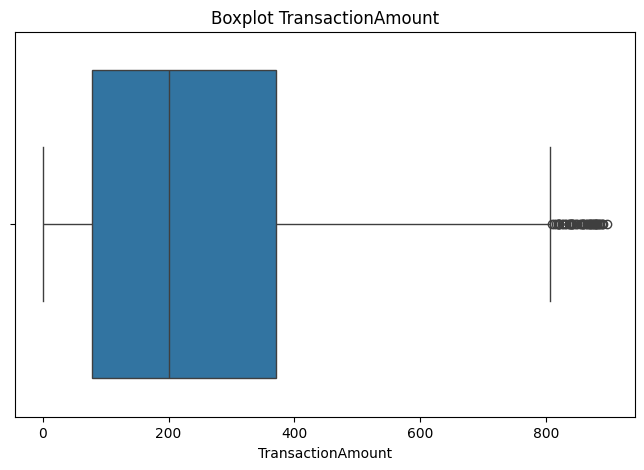

In [488]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=Bank_data_outlier['TransactionAmount'])
plt.title('Boxplot TransactionAmount')
plt.show()

Setelah melakukan IQR (Interquartile Range) nilai pada outlier masih ada namun tidak terlalu banyak, agak rincu untuk menghapus data tersebut karena ini ada pada kolom Transaction yang dimana tidak jatuh kemungkinan ada yang melakukan transaksi lebih dari itu


# Feature Encoding

Pada tahap ini adalah mengubah colim katagorical menjadi numerik dengan cara one-hot encoding yaitu mengubah setiap kategori menjadi kolom biner terpisah dengan nilai 0 atau 1 (bisa juga True atau False).

In [489]:
# Encoding one-hot untuk fitur kategorikal
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']
Bank_data = pd.get_dummies(Bank_data, columns=categorical_columns, drop_first=True, dtype=np.uint8)

In [490]:
Bank_data.head()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,...,Location_Raleigh,Location_Sacramento,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington
0,14.09,2023-04-11 16:29:14,70.0,81.0,1.0,5112.21,2024-11-04 08:08:08,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,376.24,2023-06-27 16:44:19,68.0,141.0,1.0,13758.91,2024-11-04 08:09:35,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,126.29,2023-07-10 18:16:08,19.0,56.0,1.0,1122.35,2024-11-04 08:07:04,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,184.50,2023-05-05 16:32:11,26.0,25.0,1.0,8569.06,2024-11-04 08:09:06,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,13.45,2023-10-16 17:51:24,45.0,198.0,1.0,7429.40,2024-11-04 08:06:39,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [491]:
# Tentukan kolom numerik
numerical_columns = Bank_data.select_dtypes(include=['int64', 'float64']).columns

Bank_data_numerical = Bank_data[numerical_columns]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
scaled_min_max = min_max_scaler.fit_transform(Bank_data_numerical)
print("Min-Max Scaling:\n", scaled_min_max)

# Standardization
standard_scaler = StandardScaler()
scaled_standard = standard_scaler.fit_transform(Bank_data_numerical)
print("\nStandardization:\n", scaled_standard)

Min-Max Scaling:
 [[0.00720744 0.83870968 0.24482759 0.         0.33683186]
 [0.19594028 0.80645161 0.45172414 0.         0.91805463]
 [0.06567996 0.01612903 0.15862069 0.         0.06863735]
 ...
 [0.25684655 0.56451613 0.77931034 0.         0.49283244]
 [0.10337442 0.14516129 0.25517241 0.         0.07359274]
 [0.00376788 0.75806452 0.91724138 0.         0.23751306]]

Standardization:
 [[-9.72080527e-01  1.42479563e+00 -5.50102223e-01 -2.03745432e-01
   7.24570953e-04]
 [ 2.73272455e-01  1.31224931e+00  3.10623476e-01 -2.03745432e-01
   2.23120931e+00]
 [-5.86249781e-01 -1.44513559e+00 -9.08737931e-01 -2.03745432e-01
  -1.02849141e+00]
 ...
 [ 6.75162287e-01  4.68151888e-01  1.67343917e+00 -2.03745432e-01
   5.99388150e-01]
 [-3.37523063e-01 -9.94950303e-01 -5.07065938e-01 -2.03745432e-01
  -1.00947475e+00]
 [-9.94776453e-01  1.14342982e+00  2.24725630e+00 -2.03745432e-01
  -3.80418573e-01]]


# Melakukan Binning pada colom CustomerAge dan TransactionAmount

## CostumerAge

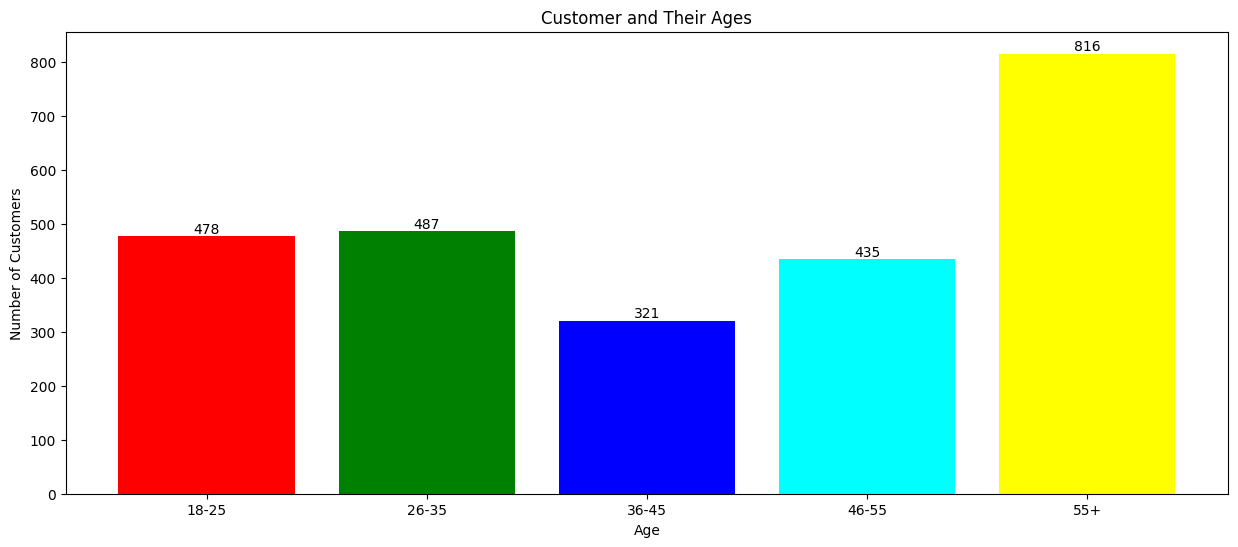

In [493]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
umur18_25 = Bank_data.CustomerAge[(Bank_data.CustomerAge >= 18) & (Bank_data.CustomerAge <= 25)]
umur26_35 = Bank_data.CustomerAge[(Bank_data.CustomerAge >= 26) & (Bank_data.CustomerAge <= 35)]
umur36_45 = Bank_data.CustomerAge[(Bank_data.CustomerAge >= 36) & (Bank_data.CustomerAge <= 45)]
umur46_55 = Bank_data.CustomerAge[(Bank_data.CustomerAge >= 46) & (Bank_data.CustomerAge <= 55)]
umur55_keatas = Bank_data.CustomerAge[Bank_data.CustomerAge >= 56]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(umur18_25.values), len(umur26_35.values), len(umur36_45.values), len(umur46_55.values), len(umur55_keatas.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()